In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SAheart.csv",index_col=0)
df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [4]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

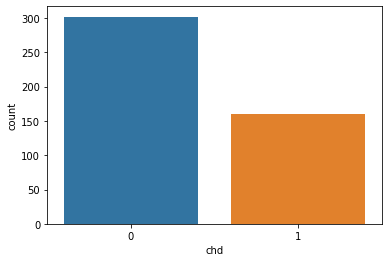

In [3]:
sns.countplot(df.chd)

In [28]:
from sklearn.utils import resample,shuffle
with_chd = df[df["chd"] == 1]
without_chd = df[df["chd"] == 0]
df_minority_upsample = resample(with_chd,replace=True,n_samples=302)
new_df = pd.concat([df_minority_upsample,without_chd])
new_df = shuffle(new_df)
new_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
71,118,0.00,3.67,12.13,Absent,51,19.15,0.60,15,0
47,162,7.40,8.55,24.65,Present,64,25.71,5.86,58,1
218,124,0.81,6.16,11.61,Absent,35,21.47,10.49,26,0
415,216,0.92,2.66,19.85,Present,49,20.58,0.51,63,1
286,148,15.00,4.98,36.94,Present,72,31.83,66.27,41,1
...,...,...,...,...,...,...,...,...,...,...
278,174,2.02,6.57,31.90,Present,50,28.75,11.83,64,1
253,166,3.00,3.82,26.75,Absent,45,20.86,0.00,63,1
19,158,2.60,7.46,34.07,Present,61,29.30,53.28,62,1


In [13]:
X_features = list(df.columns)
X_features.remove("chd")
X = pd.get_dummies(df[X_features],drop_first=True)
y = df.chd

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=20)
model = LogisticRegression(random_state=20)
log = model.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
y_pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_pred,y_test)
acc = metrics.accuracy_score(y_pred,y_test)
acc

0.7634408602150538

In [31]:
X_features2 = list(new_df.columns)
X_features2.remove("chd")
X2 = pd.get_dummies(new_df[X_features2],drop_first=True)
y2 = new_df.chd

In [32]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.2, random_state=20)
model2 = LogisticRegression(random_state=20)
log2 = model.fit(X_train2,y_train2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
y_pred2 = model.predict(X_test2)
cm2 = metrics.confusion_matrix(y_pred2,y_test2)
acc2 = metrics.accuracy_score(y_pred2,y_test2)
acc2

0.7107438016528925

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 20)
tuned_para = [{"n_estimators":[50, 100, 200, 500],"max_depth":[3, 5, 7, 9],"max_features":[0.1, 0.2, 0.3, 0.5]}]
mdl = GridSearchCV(rfc,tuned_para,cv=5,scoring="roc_auc")
mdl.fit(X_train2,y_train2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=20,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{

In [39]:
mdl.best_params_

{'max_depth': 9, 'max_features': 0.1, 'n_estimators': 500}

In [40]:
mdl.best_score_

0.9049857115926278

In [42]:
randforclf = RandomForestClassifier(max_depth= 9, max_features= 0.1, n_estimators= 500,random_state=20)
randforclf.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=0.1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [45]:
y_pred3 = randforclf.predict(X_test2)
cm3 = metrics.confusion_matrix(y_pred3,y_test2)
acc3 = metrics.accuracy_score(y_pred3,y_test2)
acc3

0.7768595041322314

In [50]:
feat_imp = pd.DataFrame({"features":X_train2.columns,"importance":randforclf.feature_importances_})
feat_imp["% importance"] = feat_imp.importance*100
feat_imp.sort_values("% importance",ascending=False)

,features,importance,% importance
1,tobacco,0.146233,14.623274
7,age,0.132978,13.297763
2,ldl,0.132541,13.254058
3,adiposity,0.121232,12.123208
4,typea,0.110731,11.073128
5,obesity,0.107261,10.726080
0,sbp,0.100339,10.033919
6,alcohol,0.096182,9.618191
8,famhist_Present,0.052504,5.250377
